In [29]:
tramos = []

precio_desde = 160000
precio_hasta = 1000000
intervalo = 50000
limite_superior = 1000001

while precio_desde <= limite_superior:
    tramo = f'?maxPrice={precio_hasta}&minPrice={precio_desde}/'
    tramos.append(tramo)
    precio_desde += intervalo
    precio_hasta += intervalo

# Imprimir la lista resultante
print(tramos)

['?maxPrice=1000000&minPrice=160000/', '?maxPrice=1050000&minPrice=210000/', '?maxPrice=1100000&minPrice=260000/', '?maxPrice=1150000&minPrice=310000/', '?maxPrice=1200000&minPrice=360000/', '?maxPrice=1250000&minPrice=410000/', '?maxPrice=1300000&minPrice=460000/', '?maxPrice=1350000&minPrice=510000/', '?maxPrice=1400000&minPrice=560000/', '?maxPrice=1450000&minPrice=610000/', '?maxPrice=1500000&minPrice=660000/', '?maxPrice=1550000&minPrice=710000/', '?maxPrice=1600000&minPrice=760000/', '?maxPrice=1650000&minPrice=810000/', '?maxPrice=1700000&minPrice=860000/', '?maxPrice=1750000&minPrice=910000/', '?maxPrice=1800000&minPrice=960000/']


In [ ]:
#https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arguelles/l?maxPrice=175000&minPrice=75000

In [3]:

from bs4 import BeautifulSoup
import requests
import pandas as pd
# Lista de distritos

tramos = []

precio_desde = 180000
precio_hasta = 500000
intervalo = 50000
limite_superior = 5000001

while precio_desde <= limite_superior:
    tramo = f'?maxPrice={precio_hasta}&minPrice={precio_desde}/'
    tramos.append(tramo)
    precio_desde += intervalo
    precio_hasta += intervalo

# Imprimir la lista resultante
print(tramos)
distritos = ['Carabanchel', 'Ciudad Lineal', 'Latina', 'Villaverde', 'Retiro', 'Arganzuela', 'Usera', 'Vicálvaro', 'Fuencarral-El Pardo', 'Moncloa-Aravaca', 'Hortaleza', 'Tetuán', 'Chamberí', 'Moratalaz', 'Centro', 'Puente de Vallecas', 'San Blás-Canillejas', 'B.Salamanca', 'Barajas', 'Villa de Vallecas', 'Chamartín']

# URL base
url_base = 'https://www.fotocasa.es/es/comprar/viviendas/madrid-capital'
#'https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arguelles/l?maxPrice=2500000&minPrice=75000'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
}

#response = requests.get(url, headers=headers)


# Encabezados para la solicitud
#headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

# Almacena los datos recopilados
all_data_2 = []

# Bucle sobre los distritos
for distrito in distritos:
    for tramo in tramos:
    # Formatea la URL para el distrito actual
        url = url_base + distrito.replace(' ', '-').lower() + '/l'
        ##+ tramo

    # Realiza la solicitud
       # response = requests.get(url, headers=headers)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        response = requests.get(url, headers=headers)

        print(f"URL: {url}\nStatus Code: {response.status_code}")

        print(f'URL: {url}')
        print(f'Status Code: {response.status_code}')

        if response.status_code == 200:
            # Parsea el contenido de la página con BeautifulSoup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Encuentra todos los elementos <a> con la clase "item-link"
            title_elements = soup.find_all('a', class_='re-CardTitle re-CardTitle--big')
            prices_elements = soup.find_all('span', class_='re-CardPrice')
            bathrooms_elements =soup.find_all('span', class_='re-CardFeaturesWithIcons-feature-icon re-CardFeaturesWithIcons-feature-icon--bathrooms')
            surface_elements = soup.find_all('span', class_='re-CardFeaturesWithIcons-feature-icon re-CardFeaturesWithIcons-feature-icon--surface')
            garages_elements = soup.find_all('span', class_='re-CardTitle re-CardTitle--big')
            elevator_elements = soup.find_all('span', class_='re-CardFeaturesWithIcons-feature-icon re-CardFeaturesWithIcons-feature-icon--elevator')
            air_conditioner_elements = soup.find_all('span', class_='re-CardFeaturesWithIcons-feature-icon re-CardFeaturesWithIcons-feature-icon--air_conditioner')
            details_elements = soup.find_all('span', class_='re-CardDescription-text re-CardDescription-text--isTwoLines')
   

            # Almacena los datos en listas
            titles = [title.text.strip() for title in title_elements]
            prices = [price.text.strip() for price in prices_elements]
            bathrooms = [bathroom.text.strip() for bathroom in bathrooms_elements]
            garages = [garage.text.strip() if garage else None for garage in garages_elements]
            details = [detail.text.strip() if detail else None for detail in details_elements]
            surfaces = [surface.text.strip() if surface else None for surface in surface_elements]
            elevators = [elevator.text.strip() if detail else None for elevator in elevator_elements]
            air_conditioners = [air_conditioner.text.strip() if air_conditioner else None for air_conditioner in air_conditioner_elements]
            # Encuentra la longitud máxima
            max_length = max(len(titles), len(prices),
                             len(air_conditioners), len(elevators), 
                             len(bathrooms), len(garages), len(details), 
                             len(surfaces))

            # Rellena las listas con valores nulos si es necesario
            titles += [None] * (max_length - len(titles))
            prices += [None] * (max_length - len(prices))
            bathrooms += [None] * (max_length - len((bathrooms)))
            garages += [None] * (max_length - len((garages)))
            surfaces += [None] * (max_length - len(surfaces))
            details += [None] * (max_length - len(details))
            elevators += [None] * (max_length - len(elevators))
            air_conditioners += [None] * (max_length - len(air_conditioners))


            # Crea un DataFrame de pandas
            data_2 = pd.DataFrame({
                'url': [url] * max_length,
               # 'Title': titles,
                'Price': prices,
                'Air conditioner': air_conditioners,
                'Garage': garages,
                'Bathrooms':bathrooms,
                'Description': details,
                'Surface': surfaces,
                'Elevator': elevators
                
            })

            # Muestra el DataFrame
            print(data_2)

            # Almacena los datos en la lista
            all_data_2.append(data_2)

            if not title_elements:
                print("No se encontraron elementos con la clase 'item-link'.\n")

        else:
            print(f"Error al obtener la página. Código de estado: {response.status_code}\n")

# Concatena todos los DataFrames en uno solo
final_data_2 = pd.concat(all_data_2, ignore_index=True)

# Muestra el DataFrame final
print("DataFrame Final:")
final_data_2

['?maxPrice=500000&minPrice=180000/', '?maxPrice=550000&minPrice=230000/', '?maxPrice=600000&minPrice=280000/', '?maxPrice=650000&minPrice=330000/', '?maxPrice=700000&minPrice=380000/', '?maxPrice=750000&minPrice=430000/', '?maxPrice=800000&minPrice=480000/', '?maxPrice=850000&minPrice=530000/', '?maxPrice=900000&minPrice=580000/', '?maxPrice=950000&minPrice=630000/', '?maxPrice=1000000&minPrice=680000/', '?maxPrice=1050000&minPrice=730000/', '?maxPrice=1100000&minPrice=780000/', '?maxPrice=1150000&minPrice=830000/', '?maxPrice=1200000&minPrice=880000/', '?maxPrice=1250000&minPrice=930000/', '?maxPrice=1300000&minPrice=980000/', '?maxPrice=1350000&minPrice=1030000/', '?maxPrice=1400000&minPrice=1080000/', '?maxPrice=1450000&minPrice=1130000/', '?maxPrice=1500000&minPrice=1180000/', '?maxPrice=1550000&minPrice=1230000/', '?maxPrice=1600000&minPrice=1280000/', '?maxPrice=1650000&minPrice=1330000/', '?maxPrice=1700000&minPrice=1380000/', '?maxPrice=1750000&minPrice=1430000/', '?maxPrice=1

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
Empty DataFrame
Columns: [url, Price, Air conditioner, Garage, Bathrooms, Description, Surface, Elevator]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
Empty DataFrame
Columns: [url, Price, Air conditioner, Garage, Bathrooms, Description, Surface, Elevator]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
Empty DataFrame
Columns: [url, Price, Air conditioner, Garage, Bathrooms, Description, S

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
Empty DataFrame
Columns: [url, Price, Air conditioner, Garage, Bathrooms, Description, Surface, Elevator]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
Empty DataFrame
Columns: [url, Price, Air conditioner, Garage, Bathrooms, Description, Surface, Elevator]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
Empty DataFrame
Columns: [url, Price, Air conditioner, Garage, Bathrooms, Description, S

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
Empty DataFrame
Columns: [url, Price, Air conditioner, Garage, Bathrooms, Description, Surface, Elevator]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
Empty DataFrame
Columns: [url, Price, Air conditioner, Garage, Bathrooms, Description, Surface, Elevator]
Index: []
No se encontraron elementos con la clase 'item-link'.

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capitalcarabanchel/l
Status Code: 200
Empty DataFrame
Columns: [url, Price, Air conditioner, Garage, Bathrooms, Description, S

KeyboardInterrupt: 

In [5]:
final_data_2

NameError: name 'final_data_2' is not defined

<!DOCTYPE html>
<html>
 <head>
  <noscript>
   <title>
    SENTIMOS LA INTERRUPCIÓN
   </title>
  </noscript>
  <meta content="width=1000" name="viewport"/>
  <meta content="noindex, nofollow" name="robots"/>
  <meta content="no-cache, no-store, must-revalidate" http-equiv="cache-control"/>
  <meta content="no-cache" http-equiv="pragma"/>
  <meta content="0" http-equiv="expires"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <style>
    .container { max-width: 800px; margin: auto; font-family: 'Helvetica Neue',Helvetica,Arial,sans-serif; color: #7a838c; }
            h1 { color: #2a2d30; font-weight: 500; }
            li { margin: 0 0 10px; }
            a { color: #428bca; }
            a:hover, a:focus { color: #2a6496; }
   </style>
   <script charset="UTF-8">
    function showBlockPage() {
                document.title = "SENTIMOS LA INTERRUPCIÓN"
                document.getElementsByClassName("container")[0].style.display = "block";
            }
   
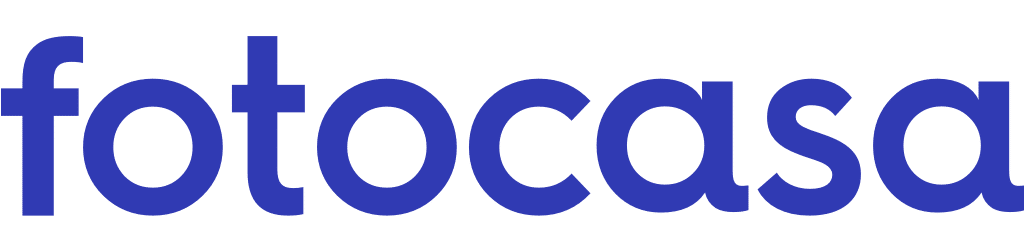

In [4]:
print(soup.prettify())

In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Lista de distritos
tramos = []
precio_desde = 180000
precio_hasta = 500000
intervalo = 50000
limite_superior = 5000001

while precio_desde <= limite_superior:
    tramo = f'?maxPrice={precio_hasta}&minPrice={precio_desde}/'
    tramos.append(tramo)
    precio_desde += intervalo
    precio_hasta += intervalo

# Imprimir la lista resultante
print(tramos)

distritos = ['Carabanchel', 'Ciudad Lineal', 'Latina', 'Villaverde', 'Retiro', 'Arganzuela', 'Usera', 'Vicálvaro', 'Fuencarral-El Pardo', 'Moncloa-Aravaca', 'Hortaleza', 'Tetuán', 'Chamberí', 'Moratalaz', 'Centro', 'Puente de Vallecas', 'San Blás-Canillejas', 'B.Salamanca', 'Barajas', 'Villa de Vallecas', 'Chamartín']

# URL base
url_base = 'https://www.fotocasa.es/es/comprar/viviendas/madrid-capital'

# Almacena los datos recopilados
all_data_2 = []

# Bucle sobre los distritos
for distrito in distritos:
    for tramo in tramos:
        # Formatea la URL para el distrito actual y el tramo
        url = f"{url_base}/{distrito.replace(' ', '-').lower()}/l{tramo}"

        # Realiza la solicitud
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        response = requests.get(url, headers=headers)

        print(f"URL: {url}\nStatus Code: {response.status_code}")

        if response.status_code == 200:
            # Parsea el contenido de la página con BeautifulSoup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Resto del código para extraer datos...

        else:
            print(f"Error al obtener la página. Código de estado: {response.status_code}\n")

# Concatena todos los DataFrames en uno solo
final_data_2 = pd.concat(all_data_2, ignore_index=True)

# Muestra el DataFrame final
print("DataFrame Final:")
print(final_data_2)

['?maxPrice=500000&minPrice=180000/', '?maxPrice=550000&minPrice=230000/', '?maxPrice=600000&minPrice=280000/', '?maxPrice=650000&minPrice=330000/', '?maxPrice=700000&minPrice=380000/', '?maxPrice=750000&minPrice=430000/', '?maxPrice=800000&minPrice=480000/', '?maxPrice=850000&minPrice=530000/', '?maxPrice=900000&minPrice=580000/', '?maxPrice=950000&minPrice=630000/', '?maxPrice=1000000&minPrice=680000/', '?maxPrice=1050000&minPrice=730000/', '?maxPrice=1100000&minPrice=780000/', '?maxPrice=1150000&minPrice=830000/', '?maxPrice=1200000&minPrice=880000/', '?maxPrice=1250000&minPrice=930000/', '?maxPrice=1300000&minPrice=980000/', '?maxPrice=1350000&minPrice=1030000/', '?maxPrice=1400000&minPrice=1080000/', '?maxPrice=1450000&minPrice=1130000/', '?maxPrice=1500000&minPrice=1180000/', '?maxPrice=1550000&minPrice=1230000/', '?maxPrice=1600000&minPrice=1280000/', '?maxPrice=1650000&minPrice=1330000/', '?maxPrice=1700000&minPrice=1380000/', '?maxPrice=1750000&minPrice=1430000/', '?maxPrice=1

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/carabanchel/l?maxPrice=2250000&minPrice=1930000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/carabanchel/l?maxPrice=2300000&minPrice=1980000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/carabanchel/l?maxPrice=2350000&minPrice=2030000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/carabanchel/l?maxPrice=2400000&minPrice=2080000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/carabanchel/l?maxPrice=2450000&minPrice=2130000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/carabanchel/l?maxPrice=2500000&minPrice=2180000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/carabanchel/l?maxPrice=2550000&minPrice=2230000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/carabanchel/l?maxP

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?maxPrice=550000&minPrice=230000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?maxPrice=600000&minPrice=280000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?maxPrice=650000&minPrice=330000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?maxPrice=700000&minPrice=380000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?maxPrice=750000&minPrice=430000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?maxPrice=800000&minPrice=480000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?maxPrice=850000&minPrice=530000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?ma

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?maxPrice=3700000&minPrice=3380000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?maxPrice=3750000&minPrice=3430000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?maxPrice=3800000&minPrice=3480000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?maxPrice=3850000&minPrice=3530000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?maxPrice=3900000&minPrice=3580000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?maxPrice=3950000&minPrice=3630000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciudad-lineal/l?maxPrice=4000000&minPrice=3680000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/ciud

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/latina/l?maxPrice=2050000&minPrice=1730000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/latina/l?maxPrice=2100000&minPrice=1780000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/latina/l?maxPrice=2150000&minPrice=1830000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/latina/l?maxPrice=2200000&minPrice=1880000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/latina/l?maxPrice=2250000&minPrice=1930000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/latina/l?maxPrice=2300000&minPrice=1980000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/latina/l?maxPrice=2350000&minPrice=2030000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/latina/l?maxPrice=2400000&minPrice=2080000/
Status Co

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/villaverde/l?maxPrice=550000&minPrice=230000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/villaverde/l?maxPrice=600000&minPrice=280000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/villaverde/l?maxPrice=650000&minPrice=330000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/villaverde/l?maxPrice=700000&minPrice=380000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/villaverde/l?maxPrice=750000&minPrice=430000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/villaverde/l?maxPrice=800000&minPrice=480000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/villaverde/l?maxPrice=850000&minPrice=530000/
Status Code: 200
URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/villaverde/l?maxPrice=900000&minPrice=5

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/villaverde/l?maxPrice=3700000&minPrice=3380000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/villaverde/l?maxPrice=3750000&minPrice=3430000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/villaverde/l?maxPrice=3800000&minPrice=3480000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/villaverde/l?maxPrice=3850000&minPrice=3530000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/villaverde/l?maxPrice=3900000&minPrice=3580000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/villaverde/l?maxPrice=3950000&

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/retiro/l?maxPrice=1150000&minPrice=830000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/retiro/l?maxPrice=1200000&minPrice=880000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/retiro/l?maxPrice=1250000&minPrice=930000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/retiro/l?maxPrice=1300000&minPrice=980000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/retiro/l?maxPrice=1350000&minPrice=1030000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/retiro/l?maxPrice=1400000&minPrice=1080000/
Status Cod

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/retiro/l?maxPrice=3500000&minPrice=3180000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/retiro/l?maxPrice=3550000&minPrice=3230000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/retiro/l?maxPrice=3600000&minPrice=3280000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/retiro/l?maxPrice=3650000&minPrice=3330000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/retiro/l?maxPrice=3700000&minPrice=3380000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/retiro/l?maxPrice=3750000&minPrice=3430000/
Status

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arganzuela/l?maxPrice=1000000&minPrice=680000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arganzuela/l?maxPrice=1050000&minPrice=730000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arganzuela/l?maxPrice=1100000&minPrice=780000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arganzuela/l?maxPrice=1150000&minPrice=830000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arganzuela/l?maxPrice=1200000&minPrice=880000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arganzuela/l?maxPrice=1250000&minPr

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arganzuela/l?maxPrice=3300000&minPrice=2980000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arganzuela/l?maxPrice=3350000&minPrice=3030000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arganzuela/l?maxPrice=3400000&minPrice=3080000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arganzuela/l?maxPrice=3450000&minPrice=3130000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arganzuela/l?maxPrice=3500000&minPrice=3180000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/arganzuela/l?maxPrice=3550000&

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/usera/l?maxPrice=750000&minPrice=430000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/usera/l?maxPrice=800000&minPrice=480000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/usera/l?maxPrice=850000&minPrice=530000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/usera/l?maxPrice=900000&minPrice=580000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/usera/l?maxPrice=950000&minPrice=630000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/usera/l?maxPrice=1000000&minPrice=680000/
Status Code: 405
Error 

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/usera/l?maxPrice=3100000&minPrice=2780000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/usera/l?maxPrice=3150000&minPrice=2830000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/usera/l?maxPrice=3200000&minPrice=2880000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/usera/l?maxPrice=3250000&minPrice=2930000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/usera/l?maxPrice=3300000&minPrice=2980000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/usera/l?maxPrice=3350000&minPrice=3030000/
Status Code:

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/vicálvaro/l?maxPrice=600000&minPrice=280000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/vicálvaro/l?maxPrice=650000&minPrice=330000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/vicálvaro/l?maxPrice=700000&minPrice=380000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/vicálvaro/l?maxPrice=750000&minPrice=430000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/vicálvaro/l?maxPrice=800000&minPrice=480000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/vicálvaro/l?maxPrice=850000&minPrice=530000/


URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/vicálvaro/l?maxPrice=2900000&minPrice=2580000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/vicálvaro/l?maxPrice=2950000&minPrice=2630000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/vicálvaro/l?maxPrice=3000000&minPrice=2680000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/vicálvaro/l?maxPrice=3050000&minPrice=2730000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/vicálvaro/l?maxPrice=3100000&minPrice=2780000/
Status Code: 405
Error al obtener la página. Código de estado: 405

URL: https://www.fotocasa.es/es/comprar/viviendas/madrid-capital/vicálvaro/l?maxPrice=3150000&minPri

KeyboardInterrupt: 